In [1]:
#importing all the important libraries to perform different tasks in this project

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing spam-ham dataset in csv file format
dataset  = pd.read_csv("spam dataset.csv")

## Lets Explore the Data ##

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

In [4]:
dataset.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [5]:
dataset.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total', 'Class'],
      dtype='object')

In [6]:
dataset.columns.shape

(58,)

In [7]:
dataset.isna()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
dataset.isnull().sum()

make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
0             0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
semicol       0
paren         0
bracket       0
bang          0
dollar        0
pound         0
cap_avg       0
cap_long      0
cap_total     0
Class         0
dtype: int64

In [9]:
dataset.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [10]:
dataset['Class'].describe()

count     4601
unique       2
top        ham
freq      2788
Name: Class, dtype: object

Now lets check if our data has any duplicate features, if we found any, we shaould drop it for better accuracies in the project

In [11]:
dataset.duplicated().sum()

391

In [12]:
#since we found 391 duplicate features, lets drop them now
dataset.drop_duplicates()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.00,0.72,0.00,0.0,2.89,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.379,7,40,spam
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,ham
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,spam
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,ham


Now lets check the correlation of our dataset using heatmap, and observe the important correlations between labels

C:\Users\Kshitiz Badola\AppData\Local\Temp\ipykernel_18140\904334970.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


<IPython.core.display.Javascript object>

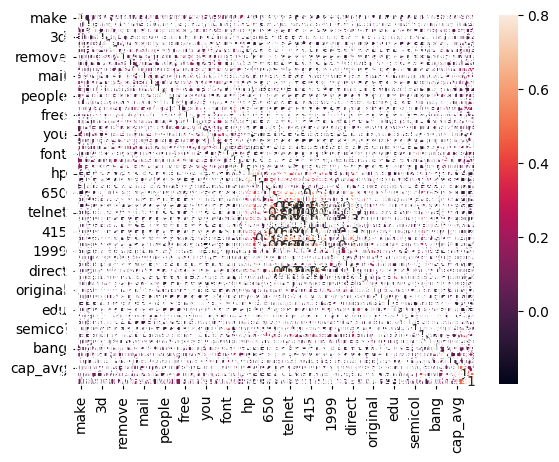

In [13]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,vmax = .8, annot=True)
plt.show()

In [14]:
#Now lets split the data using our problem statement, testing=3601 and training=1000
x= dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=3601, random_state=10, shuffle=False)

In [16]:
#now performing feature Scaling on test-train data 
st= StandardScaler() 
x_train= st.fit_transform(x_train) 
x_test= st.transform(x_test)
x_train

array([[-3.14839627e-01, -1.66366130e-01,  4.39788247e-02, ...,
        -1.41986730e-01, -3.12317744e-01, -1.52620141e-01],
       [ 1.09315404e+00, -1.66366130e-01, -5.45386201e-01, ...,
        -1.50115873e-01, -3.12317744e-01, -3.12252038e-01],
       [-3.14839627e-01, -1.66366130e-01, -5.45386201e-01, ...,
        -1.39277016e-01, -3.04197157e-01, -3.40865302e-01],
       ...,
       [-3.14839627e-01, -1.66366130e-01, -5.45386201e-01, ...,
        -9.37329737e-02, -1.33664848e-01, -3.18275883e-01],
       [-3.14839627e-01, -1.66366130e-01, -5.45386201e-01, ...,
        -1.76691915e-01, -3.85403019e-01, -4.17669328e-01],
       [ 2.01141078e+00,  5.25532685e-05,  2.26885212e-01, ...,
        -3.58909980e-02, -2.80972281e-02,  1.18768541e+00]])

## According to Problem Statement, we have to fuse 3 classifiers ((1) Decision Tree,              (2) Gaussian Naïve Bayes, and (3) Logistic Regression) using Majority Voting Rule 

In [17]:
#Logistic Regression
LR=LogisticRegression(random_state=0)

#Decision Tree 
DTC= DecisionTreeClassifier(criterion='entropy', random_state=0)

#Gaussian Naive Bayes
GNB=GaussianNB()

#Voting Classifier
Voting_Classifier=VotingClassifier(estimators=[('Decision Tree Classifier', DTC), ("Logistic Regression", LR), ("Gaussian Naive Bayes", GNB)], voting="hard")


 
#Now lets see the accuracy of our fused model
vc = Voting_Classifier.fit(x_train, y_train)
y_pred_vc = vc.predict(x_test)
vca=accuracy_score(y_test, y_pred_vc)*100    
print("Accuracy of Voting Classifier is", vca)



Accuracy of Voting Classifier is 91.69675090252709


<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

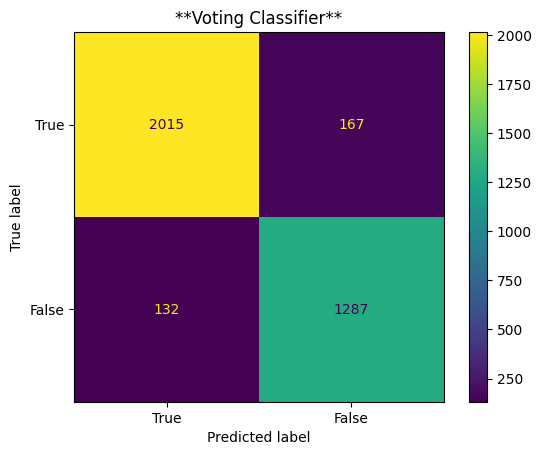

In [18]:
#Now lets create the Confusion matrix for our fused model
cm= confusion_matrix(y_test, y_pred_vc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
cm_display.plot()
cm_display.ax_.set(title="**Voting Classifier**")
plt.show

## Task 1:
Now our first task in the project is: Compare the accuracies of the fused model with AdaBoost Ensemble with Decision Tree as the base learner. Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. 
So, as of now we have the accuracy for fused model, therefore, lets implement Adaboost Classifier in our project. 

In [19]:
#Implementing AdaBoost Classifier
ada = AdaBoostClassifier()
ada= ada.fit(x_train, y_train)
y_pred_abc = ada.predict(x_test)
adaa=accuracy_score(y_test, y_pred_abc)*100    
print("Accuracy of ADABOOST Classifier is", adaa)


Accuracy of ADABOOST Classifier is 91.97445154123855


<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

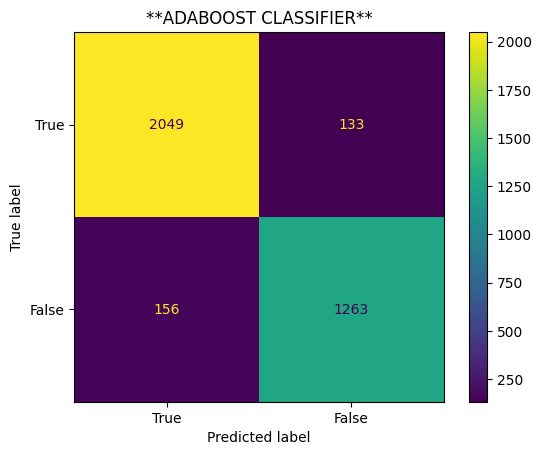

In [20]:
#Now lets create the Confusion matrix for our Adaboost model also, for better visualization 
cm= confusion_matrix(y_test, y_pred_abc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
cm_display.plot()
cm_display.ax_.set(title="**ADABOOST CLASSIFIER**")
plt.show

## My answer for Task 1 with my Observation:
The Adaboost classifier has a better performance since it classified 2049 data points correctly, as opposed to the Voting Classifier which only classified 2015 data points correctly. Also the accuracy of the model Adaboost Classifier was 91.97% which is somewhat similar but better accuracy as compared to Voting Classifier which was 91.69%.

## Task 2:
Now our second task in this project is: Compare the accuracies of the fused model with Random Forest (with 1000 base learners). Train the classifiers using the first 1000 instances and use the remaining 3601 for testing.
So, as of now we have the accuracy for fused model, therefore, lets implement Random Forest Classifier in our project.


In [21]:
#Implementing Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)
y_pred_rfc = rfc_model.predict(x_test)
rfca=accuracy_score(y_test, y_pred_rfc)*100    
print("Accuracy of Random Forest Classifier is", rfca)

Accuracy of Random Forest Classifier is 93.22410441544015


<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

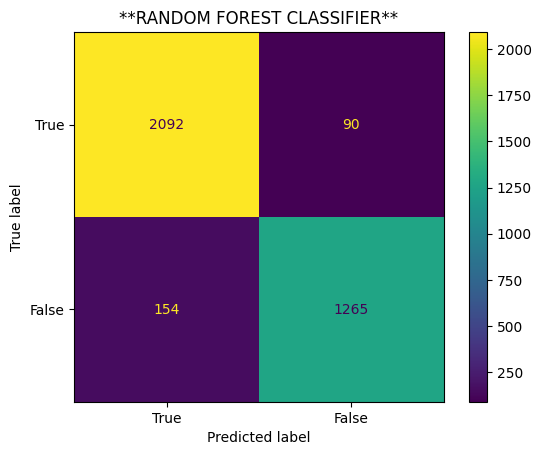

In [22]:
#Now lets create the Confusion matrix for our Random Forest Classifier model also, for better visualization 
cm= confusion_matrix(y_test, y_pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
cm_display.plot()
cm_display.ax_.set(title="**RANDOM FOREST CLASSIFIER**")
plt.show

## My answer for Task 2 with my Observation:
The Random Forest classifier has a better performance since it classified 2092 data points correctly, as opposed to the Voting Classifier which only classified 2015 data points correctly. Also the accuracy of the model Random Forest Classifier was 93.22% which is far better accuracy as compared to Voting Classifier which was 91.69%

### Task 3
Now our third and last task is: Study the impact of training sample size on the accuracies of the fused classifier and the AdaBoost Ensemble with Decision Tree as the base learner. Compare their accuracies with the following 
training-test splits: 50%-50%, 60%-40%, 70%-30%, and 80%-20%

In [23]:
# Splitting the dataset into training and testing according to our task 3 requirements.
comparision_test_size=[0.5, 0.4, 0.3, 0.2]

accuracy_VC=[]
accuracy_ADABOO=[]
for tsp in comparision_test_size:
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = tsp, random_state=0)
    print("Testing Size Considered:",tsp*100, "Training Size Considered:", (1-tsp)*100)
    
#Gaussian Naive Bayes
    G_N_B=GaussianNB()
#Decision Tree
    DC= DecisionTreeClassifier(criterion='entropy', random_state=0)
#Logistic Regression
    L_R=LogisticRegression(random_state=0)
    
#Voting Classifier
    Voting_Classifier=VotingClassifier(estimators=[('Decision Tree Classifier', DC), ("Logistic Regression", L_R), ("Gaussian Naive Bayes", G_N_B)], voting="hard")

#Again Fitting Voting Classifier
    Voting_Classifier.fit(x_train, y_train)
    y_pred=Voting_Classifier.predict(x_test)

#Now lets display the Accuracy of  Voting Classifier 
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_VC.append(accuracy)
    print("Voting Classifier Accuracy=", accuracy*100)
    
    
#AdaBoost classifier using decision tree as base classifier
    AdaBooCla=AdaBoostClassifier(n_estimators=100, random_state=0)
    AdaBooCla.fit(x_train, y_train)
    y_pred=AdaBooCla.predict(x_test)

# Now lets display accuracy of AdaBoost classifier
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_ADABOO.append(accuracy)
    print("AdaBoost Classifier Accuracy=", accuracy*100)
    print("\n")
    

Testing Size Considered: 50.0 Training Size Considered: 50.0


C:\pythonmainfiledownload\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy= 92.95958279009126
AdaBoost Classifier Accuracy= 93.95914819643633


Testing Size Considered: 40.0 Training Size Considered: 60.0


C:\pythonmainfiledownload\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy= 93.1015752308528
AdaBoost Classifier Accuracy= 93.37316675719718


Testing Size Considered: 30.0 Training Size Considered: 70.0


C:\pythonmainfiledownload\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy= 93.48298334540188
AdaBoost Classifier Accuracy= 94.2070963070239


Testing Size Considered: 20.0 Training Size Considered: 80.0


C:\pythonmainfiledownload\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy= 93.70249728555918
AdaBoost Classifier Accuracy= 94.78827361563518




## Above code performs and completes the Task 3 which was, to use the dataset and compare the accuracies of Fuse Model and AdaBoost Classifier on different training and testing values 
For test size 50 it is:
Voting Classifier Accuracy= 92.95958279009126
AdaBoost Classifier Accuracy= 93.95914819643633


For test size 40 it is:
Voting Classifier Accuracy= 93.1015752308528
AdaBoost Classifier Accuracy= 93.37316675719718



For test size 30 it is:
Voting Classifier Accuracy= 93.48298334540188
AdaBoost Classifier Accuracy= 94.2070963070239



For test size 20 it is:
Voting Classifier Accuracy= 93.70249728555918
AdaBoost Classifier Accuracy= 94.78827361563518



In [24]:
#Visualiztion in Voting Classifier for our results in Task 3:
for z in range(4):
    accuracy_VC[z]=accuracy_VC[z]*100

accuracy_VC


[92.95958279009126, 93.1015752308528, 93.48298334540188, 93.70249728555918]

In [25]:
#Visualization in Adaboost Classifier for our results in Task 3:
for z in range(4):
    accuracy_ADABOO[z]=accuracy_ADABOO[z]*100

accuracy_ADABOO
    

[93.95914819643633, 93.37316675719718, 94.2070963070239, 94.78827361563518]

## Now lets plot a graph for better Visualization using different training sizes in Task 3

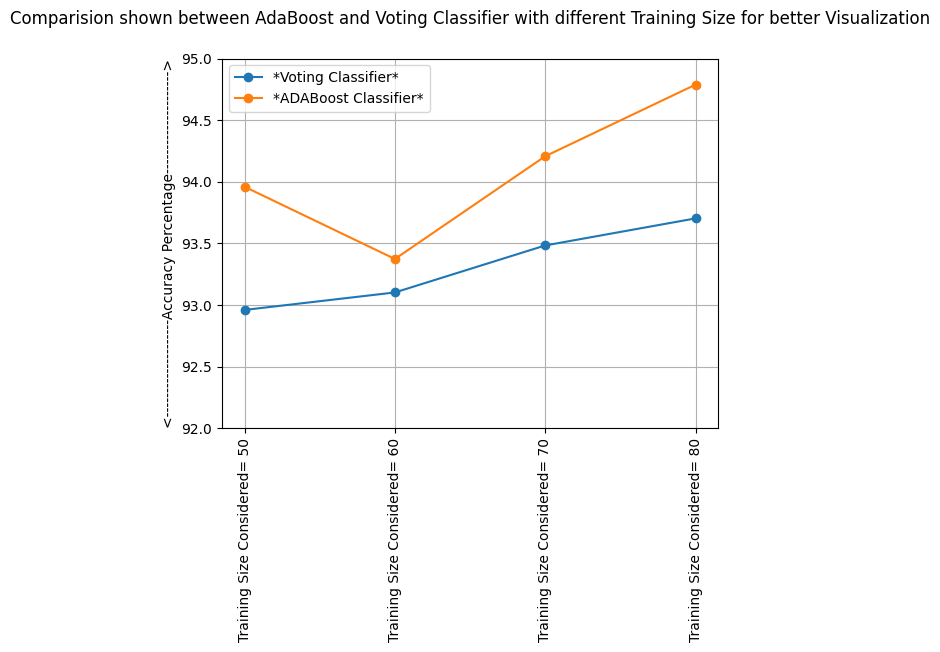

In [26]:
trainingSize=[50, 60, 70, 80]
train_size_list=["Training Size Considered= 50", "Training Size Considered= 60", "Training Size Considered= 70", "Training Size Considered= 80"]

plt.plot(trainingSize,accuracy_VC, label="*Voting Classifier*", marker='o')
plt.plot(trainingSize,accuracy_ADABOO, label="*ADABoost Classifier*", marker='o')
plt.ylim(92, 95)
plt.xticks(trainingSize, train_size_list, rotation='vertical')
plt.ylabel("<--------------------Accuracy Percentage--------------------->")
plt.title("Comparision shown between AdaBoost and Voting Classifier with different Training Size for better Visualization", pad="25.0")
plt.grid(True)
plt.legend()
plt.show()


## Per Class Classification Accuracies
In our Metrics statement in the problem report by the professor, we are asked to compare perclass classification also, so lets do that.

In [27]:
#ignore this cell, this is just to remove warnings for the cell below it
import warnings
warnings.filterwarnings("ignore")

In [28]:
three_clfs={"Voting Clasifier": Voting_Classifier, "Adaboost Classifier":ada, "Random Forest Classifier": rfc_model, "Decision Tree Classifier": DC, "Logistic Regression" : L_R, "Gaussian Naive Bayes": G_N_B}

for clf in three_clfs:
    clfs=three_clfs[clf]
    clfs.fit(x_train, y_train)
    y_pred=clfs.predict(x_test)
    cm= confusion_matrix(y_test, y_pred)
    TruePositive_RC, FalseNegative_RC, FalsePositive_RC, TrueNegative_RC=cm[0][0], cm[0][1], cm[1][0], cm[1][1] 
    print(clf)
    print("Per Class Classification Accuracy for 'True Cases' in", clf, "is ", (TruePositive_RC/(TruePositive_RC+FalseNegative_RC)))
    print("Per Class Classification Accuracy for 'False Cases' in", clf, "is ", (TrueNegative_RC/(FalsePositive_RC+TrueNegative_RC)))
    accuracy=accuracy_score(y_test, y_pred)
    #we already have seen these accuracies in the above code, but lets print them again for our comparisions
    print("Accuracy of ", clf, "is", accuracy*100)
    print("\n")


Voting Clasifier
Per Class Classification Accuracy for 'True Cases' in Voting Clasifier is  0.9248251748251748
Per Class Classification Accuracy for 'False Cases' in Voting Clasifier is  0.9570200573065902
Accuracy of  Voting Clasifier is 93.70249728555918


Adaboost Classifier
Per Class Classification Accuracy for 'True Cases' in Adaboost Classifier is  0.9545454545454546
Per Class Classification Accuracy for 'False Cases' in Adaboost Classifier is  0.9283667621776505
Accuracy of  Adaboost Classifier is 94.46254071661238


Random Forest Classifier
Per Class Classification Accuracy for 'True Cases' in Random Forest Classifier is  0.9685314685314685
Per Class Classification Accuracy for 'False Cases' in Random Forest Classifier is  0.9283667621776505
Accuracy of  Random Forest Classifier is 95.33116178067318


Decision Tree Classifier
Per Class Classification Accuracy for 'True Cases' in Decision Tree Classifier is  0.9353146853146853
Per Class Classification Accuracy for 'False Cases' 

## Comparisions and Assumptions made after the above code observation:
According to per class classification accuracy in task 1:
Adaboost Classifier and Voting Classifier almost provided the same accuracies, but ababoost provided slightly better accuracy than voting classifier which was our fused classifier.

According to per class classification accuracy in task 2:
It is very clear and evident that, Random Forest Classifier provided better accuracy as compared to Voting classifier which is our fused model.